# 🖼️ Project: Image Generation with Pre-trained Models

**Platform:** Python (Jupyter Notebook / Google Colab)  
**Libraries Used:**  
- PyTorch  
- Diffusers (Hugging Face)  
- Matplotlib  
- JSON & datetime utilities  

---

## 🎯 Project Objective  
Utilize **pre-trained generative models** such as **Stable Diffusion** to create images from natural language prompts.  
Explore the model’s ability to generate creative, high-quality, and contextually relevant images.

---

## 📦 What's Inside  
- Install and load the **Stable Diffusion Pipeline** from Hugging Face Diffusers  
- Prepare and customize **text prompts** for generation  
- Generate multiple images from a single prompt  
- Visualize results using **Matplotlib**  
- Save generated images with timestamps for record-keeping

---

## 🛠 Techniques Used  
- **Pre-trained diffusion models** for text-to-image synthesis  
- Hugging Face **Diffusers** API  
- **Prompt engineering** to influence output quality and style  
- Image visualization with **Matplotlib**  
- File management & logging for generated outputs


In [1]:
# Install Packages
# Run this first! Takes about 1-2 minutes

print("🎨 Setting up AI image generation...")

import subprocess
import sys

packages = [
    "diffusers",
    "transformers",
    "accelerate",
    "torch",
    "matplotlib"
]

for package in packages:
    print(f"Installing {package}...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", package, "--quiet"])

print("✅ All done! Continue to next cell.")

🎨 Setting up AI image generation...
Installing diffusers...
Installing transformers...
Installing accelerate...
Installing torch...
Installing matplotlib...
✅ All done! Continue to next cell.


In [2]:
# Import libraries
import torch
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import time
from datetime import datetime
import json

# Check if we have GPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using: {device}")
if device == "cuda":
    print(f"GPU: {torch.cuda.get_device_name(0)}")

print("✅ Ready to generate images!")

Using: cuda
GPU: Tesla T4
✅ Ready to generate images!


In [3]:
# Load the AI model
print("🤖 Loading Stable Diffusion model...")
print("(This takes 1-2 minutes first time)")

pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16 if device == "cuda" else torch.float32,
    safety_checker=None,
    requires_safety_checker=False
).to(device)

# Make it faster
if device == "cuda":
    pipe.enable_attention_slicing()

print("✅ Model loaded! Ready to create images!")

# Keep track of our generations
generation_history = []

🤖 Loading Stable Diffusion model...
(This takes 1-2 minutes first time)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

✅ Model loaded! Ready to create images!


🎨 Creating: 'A cute robot painting a picture in an art studio'
⚙️ Steps: 15, Guidance: 7.5
🔄 Generating... (this takes 10-30 seconds)


  0%|          | 0/15 [00:00<?, ?it/s]

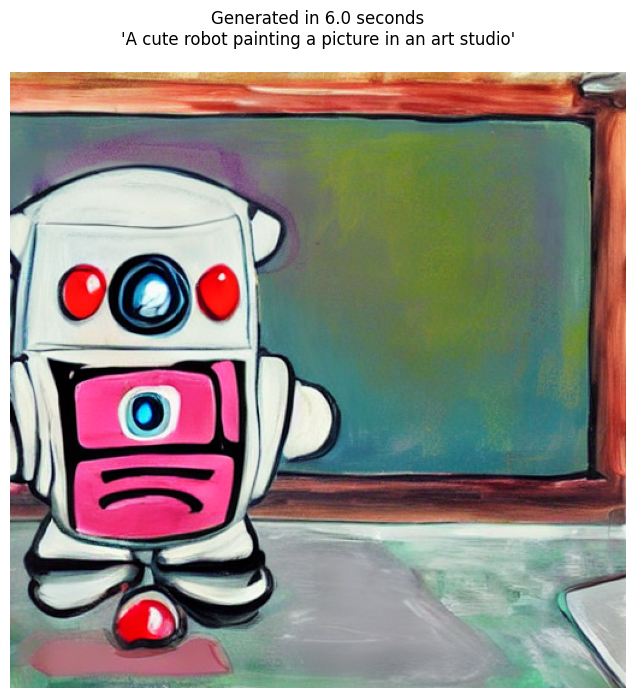

✅ Done! Generated in 6.0 seconds


In [4]:
# Generate Single Image
# Change these variables to customize:

prompt = "A cute robot painting a picture in an art studio"
steps = 15  # 10-50, lower = faster
guidance = 7.5  # 1-15, higher = follows prompt more

print(f"🎨 Creating: '{prompt}'")
print(f"⚙️ Steps: {steps}, Guidance: {guidance}")

start_time = time.time()
print("🔄 Generating... (this takes 10-30 seconds)")

# Generate the image
with torch.autocast(device):
    result = pipe(
        prompt=prompt,
        num_inference_steps=steps,
        guidance_scale=guidance,
        width=512,
        height=512
    )

image = result.images[0]
generation_time = time.time() - start_time

# Save info
generation_info = {
    'prompt': prompt,
    'time': generation_time,
    'steps': steps,
    'guidance': guidance,
    'timestamp': datetime.now().isoformat()
}
generation_history.append(generation_info)

# Show the image
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis('off')
plt.title(f"Generated in {generation_time:.1f} seconds\n'{prompt}'", fontsize=12, pad=20)
plt.show()

print(f"✅ Done! Generated in {generation_time:.1f} seconds")

# Clean up GPU memory
if device == "cuda":
    torch.cuda.empty_cache()

🔄 Generating 3 images...

1/3: A magical forest with glowing mushrooms


  0%|          | 0/25 [00:00<?, ?it/s]

✅ Done in 6.7s

2/3: A futuristic city at sunset


  0%|          | 0/25 [00:00<?, ?it/s]

✅ Done in 6.7s

3/3: A cozy coffee shop in winter


  0%|          | 0/25 [00:00<?, ?it/s]

✅ Done in 6.7s


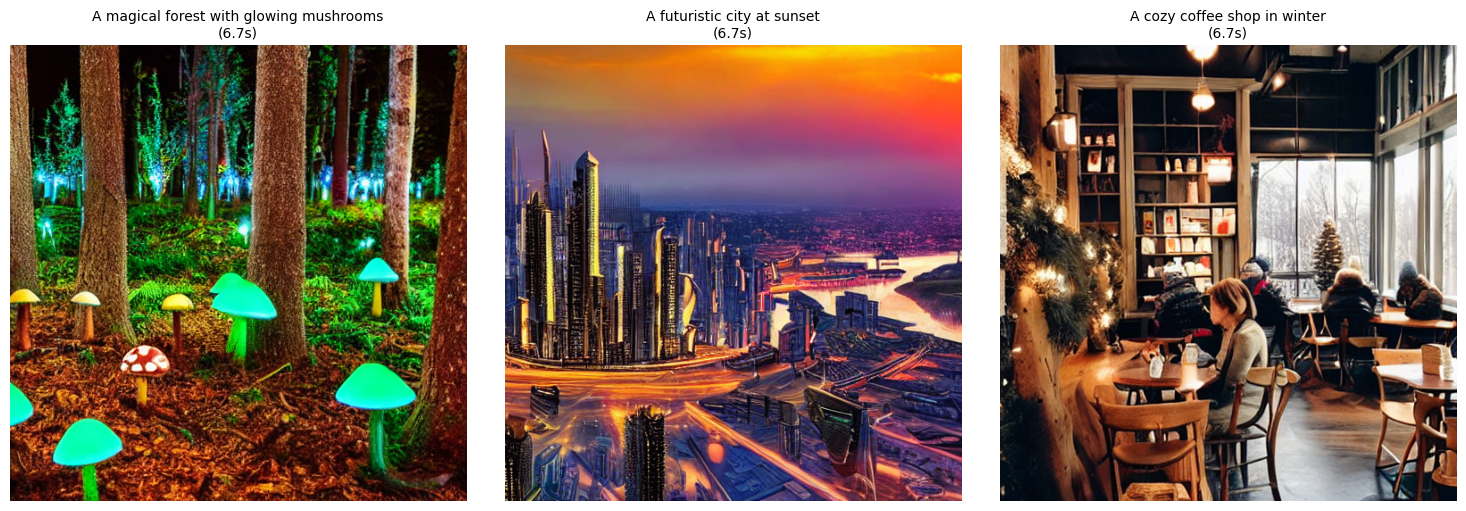


🎉 All done! Average time: 6.7s


In [5]:
# Generate Multiple Images
# Edit the prompts list below:

prompts = [
    "A magical forest with glowing mushrooms",
    "A futuristic city at sunset",
    "A cozy coffee shop in winter"
]

print(f"🔄 Generating {len(prompts)} images...")

images = []
times = []

for i, prompt in enumerate(prompts):
    print(f"\n{i+1}/{len(prompts)}: {prompt}")

    start_time = time.time()

    with torch.autocast(device):
        result = pipe(
            prompt=prompt,
            num_inference_steps=25,
            guidance_scale=7.5
        )

    image = result.images[0]
    gen_time = time.time() - start_time

    images.append(image)
    times.append(gen_time)

    generation_history.append({
        'prompt': prompt,
        'time': gen_time,
        'steps': 25,
        'guidance': 7.5,
        'timestamp': datetime.now().isoformat()
    })

    print(f"✅ Done in {gen_time:.1f}s")

# Show all images
fig, axes = plt.subplots(1, len(images), figsize=(5*len(images), 5))
if len(images) == 1:
    axes = [axes]

for i, (image, prompt, time_taken) in enumerate(zip(images, prompts, times)):
    axes[i].imshow(image)
    axes[i].axis('off')
    axes[i].set_title(f"{prompt}\n({time_taken:.1f}s)", fontsize=10)

plt.tight_layout()
plt.show()

print(f"\n🎉 All done! Average time: {sum(times)/len(times):.1f}s")

if device == "cuda":
    torch.cuda.empty_cache()

🎭 Trying different styles for: 'A mountain landscape'

Generating: oil painting


  0%|          | 0/30 [00:00<?, ?it/s]

✅ 8.0s

Generating: watercolor


  0%|          | 0/30 [00:00<?, ?it/s]

✅ 8.1s

Generating: digital art


  0%|          | 0/30 [00:00<?, ?it/s]

✅ 8.1s

Generating: cartoon style


  0%|          | 0/30 [00:00<?, ?it/s]

✅ 8.2s


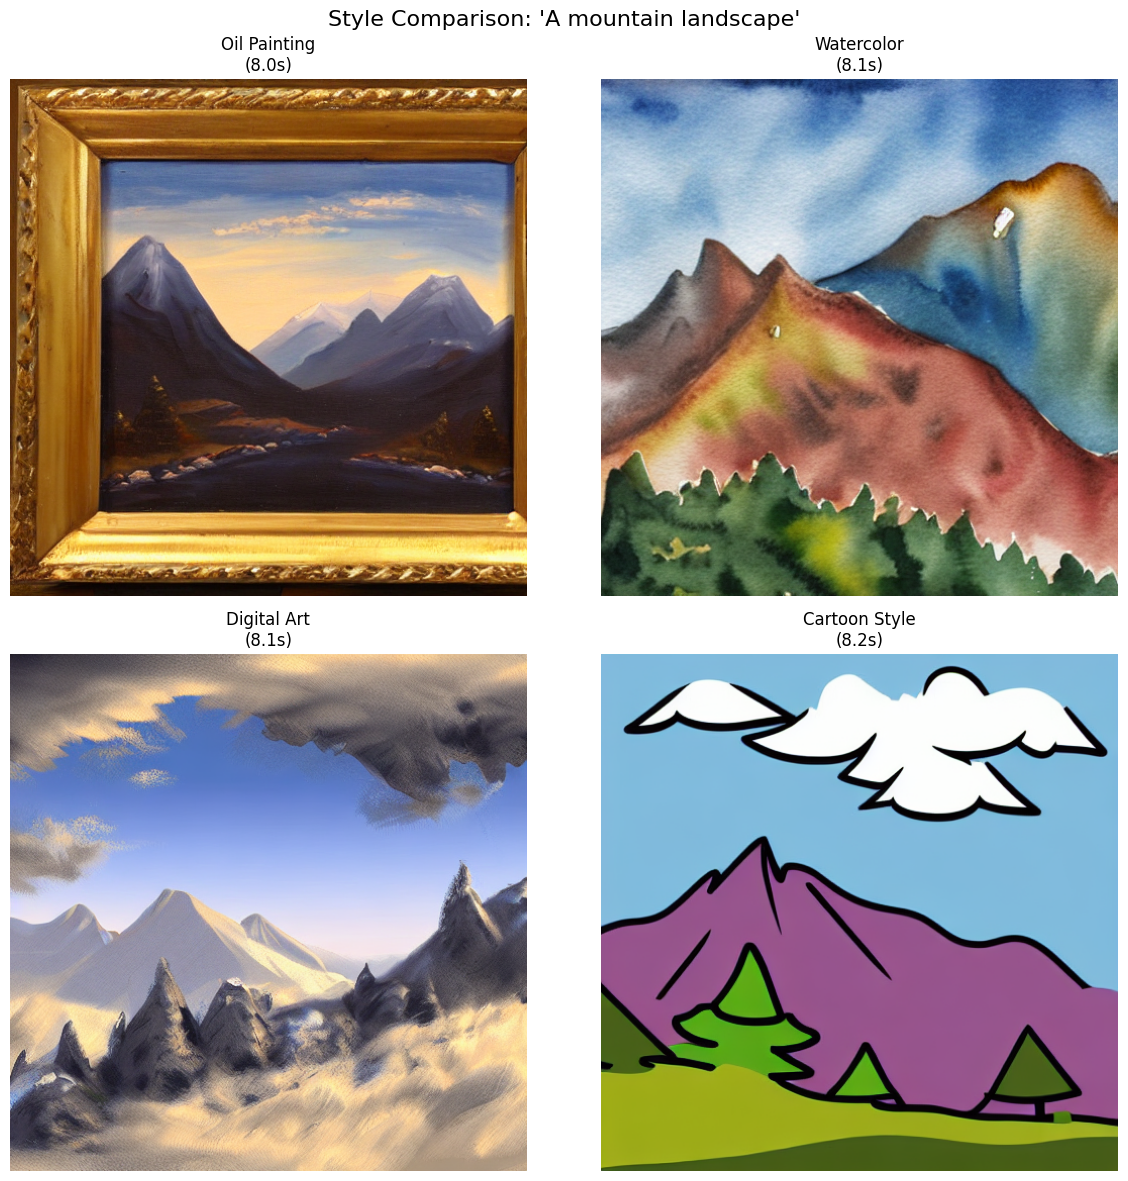


🎨 Style test complete!


In [6]:
# Try Different Styles
# Change the base_prompt below:

base_prompt = "A mountain landscape"

styles = [
    "oil painting",
    "watercolor",
    "digital art",
    "cartoon style"
]

print(f"🎭 Trying different styles for: '{base_prompt}'")

style_images = []
style_times = []

for style in styles:
    full_prompt = f"{base_prompt}, {style}"
    print(f"\nGenerating: {style}")

    start_time = time.time()

    with torch.autocast(device):
        result = pipe(
            prompt=full_prompt,
            num_inference_steps=30,
            guidance_scale=8.0
        )

    image = result.images[0]
    gen_time = time.time() - start_time

    style_images.append(image)
    style_times.append(gen_time)

    generation_history.append({
        'prompt': full_prompt,
        'time': gen_time,
        'steps': 30,
        'guidance': 8.0,
        'timestamp': datetime.now().isoformat()
    })

    print(f"✅ {gen_time:.1f}s")

# Show style comparison
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten()

for i, (image, style, time_taken) in enumerate(zip(style_images, styles, style_times)):
    axes[i].imshow(image)
    axes[i].axis('off')
    axes[i].set_title(f"{style.title()}\n({time_taken:.1f}s)", fontsize=12)

plt.suptitle(f"Style Comparison: '{base_prompt}'", fontsize=16)
plt.tight_layout()
plt.show()

print(f"\n🎨 Style test complete!")

if device == "cuda":
    torch.cuda.empty_cache()

📊 SESSION STATS
🖼️  Images generated: 8
⏱️  Average time: 7.3s
🚀 Fastest: 6.0s
🐌 Slowest: 8.2s


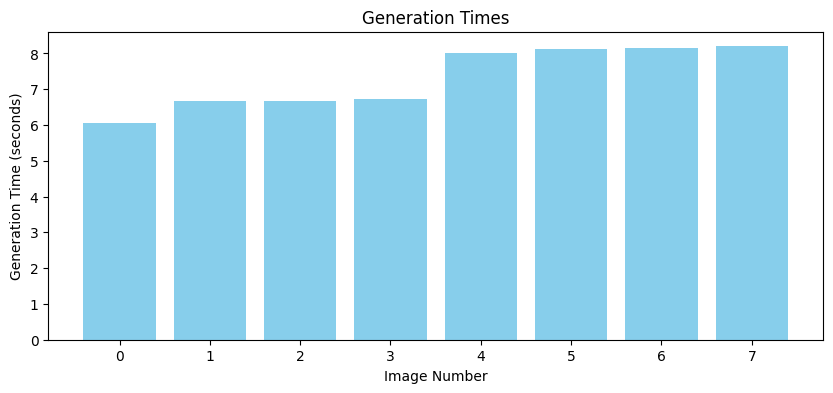


✅ Not bad for an internship project! 🎉


In [7]:
# Show Session Stats
if generation_history:
    print("📊 SESSION STATS")
    print("=" * 20)

    total_images = len(generation_history)
    times = [g['time'] for g in generation_history]
    avg_time = sum(times) / len(times)
    fastest = min(times)
    slowest = max(times)

    print(f"🖼️  Images generated: {total_images}")
    print(f"⏱️  Average time: {avg_time:.1f}s")
    print(f"🚀 Fastest: {fastest:.1f}s")
    print(f"🐌 Slowest: {slowest:.1f}s")

    # Simple chart
    plt.figure(figsize=(10, 4))
    plt.bar(range(len(times)), times, color='skyblue')
    plt.xlabel('Image Number')
    plt.ylabel('Generation Time (seconds)')
    plt.title('Generation Times')
    plt.show()

    print("\n✅ Not bad for an internship project! 🎉")
else:
    print("No images generated yet! Try the cells above first.")

In [8]:
# Save Results
if generation_history:
    # Create simple report
    report = {
        "project": "AI Image Generation Internship",
        "date": datetime.now().isoformat(),
        "total_images": len(generation_history),
        "average_time": sum(g['time'] for g in generation_history) / len(generation_history),
        "generations": generation_history
    }

    # Save as JSON
    filename = f"image_generation_results_{datetime.now().strftime('%Y%m%d_%H%M')}.json"

    with open(filename, 'w') as f:
        json.dump(report, f, indent=2)

    print(f"💾 Results saved to: {filename}")
    print(f"📊 Generated {report['total_images']} images")
    print(f"⏱️  Average time: {report['average_time']:.1f}s")

    print("\n🎯 Perfect for your internship presentation!")
else:
    print("Nothing to save yet! Generate some images first.")

💾 Results saved to: image_generation_results_20250811_0726.json
📊 Generated 8 images
⏱️  Average time: 7.3s

🎯 Perfect for your internship presentation!


  

## END
## ^ . ^ /